# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:

In [128]:
# =========================
# Part 1 – Student Details
# =========================

students = [
    {"name": "Daniel G", "4_digits_ID": "1778" },
    {"name": "Yakov BH", "4_digits_ID": "3667"},
]

import pandas as pd
display(pd.DataFrame(students))

,name,4_digits_ID
0,Daniel G,1778
1,Yakov BH,3667


## Part 1(b) – שימוש ב-AI (ChatGPT)
<pre>
השתמשנו ב-AI (ChatGPT) כדי לוודא שה-flow עומד בדרישות המטלה:

 לבחור מדד איכות מתאים (F1 למחלקה החיובית Survived=1),

  לבנות Grid Search עם 5-fold Cross-Validation,

  ולהשתמש ב-Pipeline כדי למנוע דליפת מידע (Data Leakage).

   לאחר מכן בדקנו את ההחלטות והקוד ידנית מול ההנחיות והרצנו את המחברת כדי לוודא שהכול עובד.
   </pre>


#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
AI agent name: ChatGPT (GPT-5)
Goal: להיעזר בהבנת דרישות המטלה ובבניית Flow נכון של למידה מונחית (ללא Data Leakage), כולל ניסויים עם 5-fold CV ו-Grid Search.

Prompt1:
"יש לנו מטלה שבה צריך לבצע תהליך מלא של למידת מכונה על Titanic (Classification). תוכל לפרט שלבים מומלצים ל-flow מקצה לקצה (טעינה, EDA, preprocessing, ניסויים עם 5-fold cross validation, Grid Search, בחירת מודל, אימון מחדש על כל ה-train ובדיקה על test) כך שיעמוד בדרישות המטלה?"

What I used it for:
להבין את מבנה ה-flow שהבודקים מצפים לראות ולוודא שההפרדה בין train/test נשמרת (לא משתמשים ב-test בזמן הניסויים).

Prompt2:
"אני רוצה לבצע Grid Search עם Feature Engineering בתוך Pipeline כדי למנוע leakage. תן דוגמה ל-Pipeline עם ColumnTransformer (impute + one-hot), ואחריו scaler (passthrough / StandardScaler / MinMaxScaler), ואז SelectKBest, ואז מודל, יחד עם scoring='f1' ו-5-fold StratifiedKFold."

What I used it for:
לבנות את הניסויים בצורה נכונה טכנית: כל הטרנספורמציות מתבצעות בתוך ה-fold ולא על כל הדאטה מראש, והמדד שנמדד הוא F1 למחלקה החיובית (Survived=1).

Prompt3:
"מהן ויזואליזציות EDA שמתאימות ל-Titanic ויכולות לתרום לתהליך הבחירה? תן דוגמאות לגרפים שמראים התפלגות יעד, קשרים בין מאפיינים ל-Survived, וחסרים (missing values)."

What I used it for:
לבחור ויזואליזציות שמשרתות את ה-flow ולא רק 'קישוט': התפלגות Survived, missing values, וקשרים בין מאפיינים חשובים לבין היעד.

AI agent name 2: None
Goal: -
Prompt1: -
Prompt2: -
Prompt3: -

Other assistance:
לא השתמשנו במקורות חיצוניים נוספים מעבר לספריות המותרות (pandas / numpy / sklearn / matplotlib) והנתונים שניתנו במטלה.
</pre>


## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
מטרת בעיית הלמידה היא לבצע סיווג (classification) של נוסעי הטיטניק – כלומר, לחזות האם נוסע מסוים שרד את הטביעה או לא, בהתבסס על מאפייניו האישיים. הדאטהסט כולל עמודות כמו גיל, מין, מחיר הכרטיס, מחלקת הישיבה, מספר קרובי משפחה שהיו עם הנוסע על הסיפון ועוד. הנתונים עוברים תהליך של עיבוד מוקדם: ניקוי, השלמה לערכים חסרים והמרה לייצוגים נומריים. לאחר מכן מופעלים אלגוריתמים של למידה מונחית, כגון K-Nearest Neighbors (KNN), Naive Bayes ועץ החלטה (Decision Tree), על מנת לאמן מודלים על קבוצת האימון ולבחון את ביצועיהם על קבוצת הבדיקה. ביצועי המודלים נמדדים באמצעות מדדים כמו דיוק (Accuracy), Precision, Recall ו־F1 Score, במטרה לבחור את המודל הטוב ביותר לחיזוי.
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [129]:
# ייבוא של ספריות רלוונטיות

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import make_scorer
import numpy as np


In [130]:
#פונקציה לטעינת הדאטהסט מקובץ אקסל לתוך דאטהפריים

def load_dataset(file_name):
    df = pd.read_csv(file_name)
    return df

In [131]:
#טעינת הטריין-סט והצגת 5 שורות ראשונות

trainset=load_dataset("titanic_train.csv")
print(trainset.shape)
trainset.head()

(712, 8)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [132]:
#טעינת הטסט-סט והצגת 5 שורות ראשונות

testset=load_dataset("titanic_test.csv")
print(testset.shape)
testset.head()

(179, 8)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [133]:
# הצגה טבלאית 1
#תקציר ססטיסטי על הנתונים. למשל: ממוצע, מינימום, מקסימום, סטיית תקן, אחוזונים

trainset.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


In [134]:
# הצגה טבלאית 2
# הצגת העמודות, טיפוס הנתונים בכל עמודה, וכמה ערכים חסרים בעמודה

trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB


In [135]:
# הצגה טבלאית 3
# חישוסב מטריצת המקדמים, שזו מטריצה המודדת את הקשר הלינארי בין שני משתנים
#הערכים נעים בין 1 ל1- כך ש: 1 מצביע על קשר חיובי מושלם, 1- על קשר שלילי מושלם ו-0 על חוסר קשר

corr_matrix = trainset.corr()
corr_matrix

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Pclass,1.000000,0.126986,-0.319927,0.093572,0.048225,-0.543722,0.040708,-0.324024
Sex,0.126986,1.000000,0.089108,-0.079976,-0.242467,-0.183650,-0.124908,-0.550699
Age,-0.319927,0.089108,1.000000,-0.270404,-0.202725,0.071787,0.031524,-0.072729
SibSp,0.093572,-0.079976,-0.270404,1.000000,0.415491,0.136861,-0.049109,-0.031052
Parch,0.048225,-0.242467,-0.202725,0.415491,1.000000,0.151631,-0.072698,0.074699
Fare,-0.543722,-0.183650,0.071787,0.136861,0.151631,1.000000,0.078197,0.264345
Embarked,0.040708,-0.124908,0.031524,-0.049109,-0.072698,0.078197,1.000000,0.099162
Survived,-0.324024,-0.550699,-0.072729,-0.031052,0.074699,0.264345,0.099162,1.000000


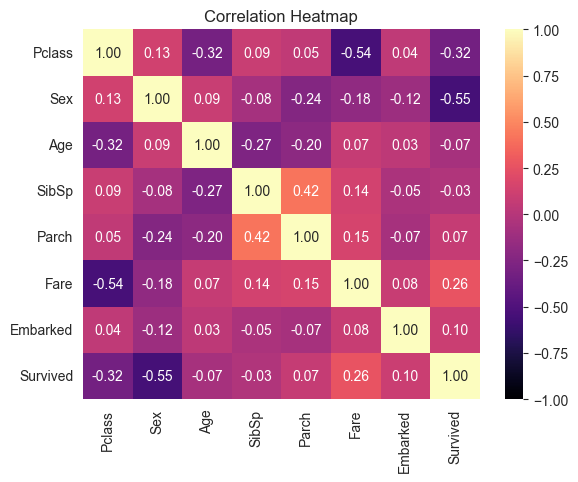

In [136]:
# הצגה ויזואלית 1 
#יצירת מפת חום למטריצת המתאם
#ניתן לראות כאן שעבור הצבע צהוב בהיר- התקשר מושלם כי זה משתנה מול עצמו
#גוונים אדום כתום מראים על קשר חיובי
#גוונים כחולים כהים-שחורים מראים על קשר שלילי
#גוון סגול-ורוד מצביע על חוסר קשר

plt.figure()
sns.heatmap(corr_matrix, annot=True, fmt='.2f',cmap='magma', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Continuous Variables - before scaling...')

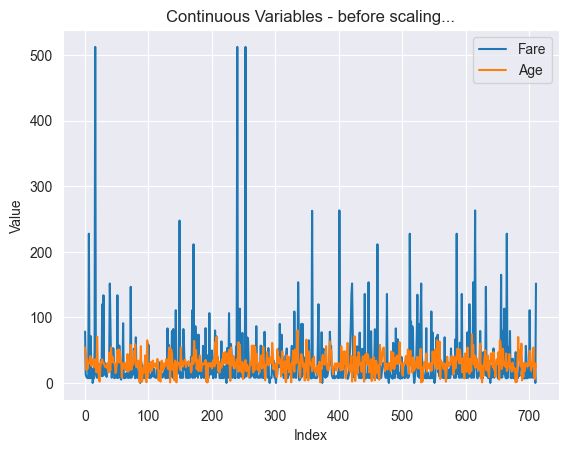

In [137]:
# הצגה ויזואלית 2 
# הנתונים בעלי ערך רציף ובטווחים קיצוניים בין עמודות
#ניתן לראות שהגרף קשה לקריאה וניתוח הנתונים כך עלול לפגוע בתוצאות הניסויים
#בהמשך נראה את הגרף שוב, לאחר ביצוע סקאלינג

continuous_columns = ['Fare','Age']
trainset[continuous_columns].plot()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Continuous Variables - before scaling...')

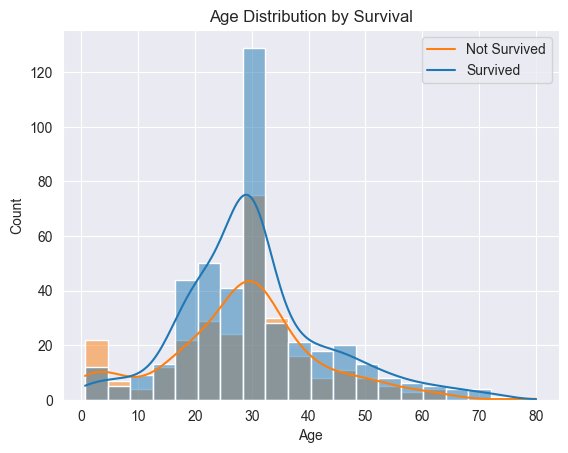

In [138]:
# הצגה ויזואלית 3 
#יצירת גרף התפלגות גיל הנוסעים לפי הישרדותם
#ניתו לראות שרוב הנוסעים שלא שרדו היא בקבוצת הגילאים 20-30 והנוסעים ששרדו היו בעיקר בני 20-40

sns.histplot(data=trainset, x='Age', hue='Survived', kde=True, bins=20)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

In [161]:
#בדיקת ערכים חסרים
# ניתן לראות שאין ערכים חסרים גם בטריין-סט וגם בטסט-סט, ולכן אין צורך בטיפול בהם

missing_train = trainset.isnull().sum()
missing_test = testset.isnull().sum()

print(missing_train) 
print('\n')
print(missing_test)

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Survived       0
FamilySize     0
AgeCategory    0
dtype: int64


Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Survived       0
FamilySize     0
AgeCategory    0
dtype: int64


In [140]:
# הוספת עמודה של מספר בני המשפחה בטריין-סט

trainset['FamilySize'] = trainset['SibSp'] + trainset['Parch'] + 1
trainset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize
0,1,0,54.0,1,0,78.2667,1,1,2
1,2,0,45.0,0,0,13.5000,0,1,1
2,3,1,20.0,0,0,9.5000,0,0,1
3,3,1,36.0,0,0,7.8958,0,0,1
4,3,1,22.0,0,0,8.0500,0,0,1


In [141]:
# הוספת עמודה של מספר בני המשפחה בטסט-סט

testset['FamilySize'] = testset['SibSp'] + testset['Parch'] + 1
testset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize
0,3,1,35.000000,0,0,7.0500,0,0,1
1,3,1,30.000000,0,0,7.2500,0,0,1
2,3,1,29.699118,0,0,14.5000,0,0,1
3,3,0,21.000000,0,0,7.7500,2,0,1
4,3,1,32.000000,0,0,56.4958,0,1,1


In [142]:
# יצירת עמודה קטגוריאלית לפי עמודת גיל בטריין-סט

bins = [0, 12, 18, 30, 50, 200]  ## הגדרת גבולות עבור קטגוריות הגיל
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']# הגדרת תוויות עבור כל קטגוריית גיל 
trainset['AgeCategory'] = pd.cut(trainset['Age'], bins=bins, labels=labels) #יצירת העמודה
#מיפוי בין התווית של הקטגוריה לקידוד המספרי
category_mapping = {'Child': 1, 'Teenager': 2, 'Young Adult': 3, 'Adult': 4, 'Senior': 5}
trainset['AgeCategory'] = trainset['AgeCategory'].map(category_mapping) #הגדרת המיפוי בתוך העמודה
trainset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize,AgeCategory
0,1,0,54.0,1,0,78.2667,1,1,2,5
1,2,0,45.0,0,0,13.5000,0,1,1,4
2,3,1,20.0,0,0,9.5000,0,0,1,3
3,3,1,36.0,0,0,7.8958,0,0,1,4
4,3,1,22.0,0,0,8.0500,0,0,1,3


In [143]:
# יצירת עמודה קטגוריאלית לפי עמודת גיל בטסט-סט

bins = [0, 12, 18, 30, 50, 200]  ## הגדרת גבולות עבור קטגוריות הגיל
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']# הגדרת תוויות עבור כל קטגוריית גיל 
testset['AgeCategory'] = pd.cut(testset['Age'], bins=bins, labels=labels) #יצירת העמודה
#מיפוי בין התווית של הקטגוריה לקידוד המספרי
category_mapping = {'Child': 1, 'Teenager': 2, 'Young Adult': 3, 'Adult': 4, 'Senior': 5}
testset['AgeCategory'] = testset['AgeCategory'].map(category_mapping) #הגדרת המיפוי בתוך העמודה
testset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize,AgeCategory
0,3,1,35.000000,0,0,7.0500,0,0,1,4
1,3,1,30.000000,0,0,7.2500,0,0,1,3
2,3,1,29.699118,0,0,14.5000,0,0,1,3
3,3,0,21.000000,0,0,7.7500,2,0,1,3
4,3,1,32.000000,0,0,56.4958,0,1,1,4


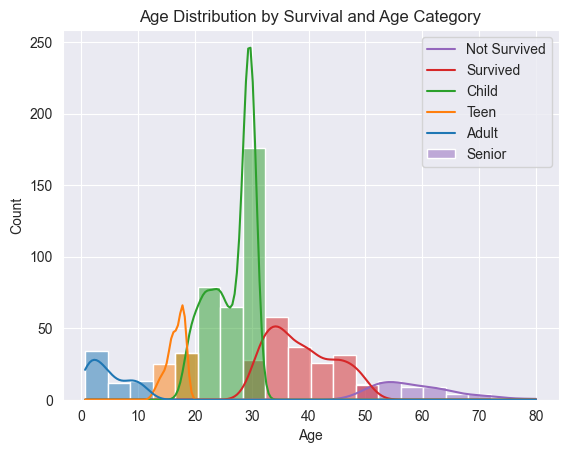

In [144]:
# ויזואליזציה עם עמודת הקטגוריה החדשה לגילאים
#ניתן לראות שהרוב
sns.histplot(data=trainset, x='Age', hue='AgeCategory', kde=True, bins=20)
plt.title('Age Distribution by Survival and Age Category')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived', 'Child', 'Teen', 'Adult', 'Senior'])
plt.show()

In [145]:
# סקאלינג

scaler = MinMaxScaler()  #הגדרת מודל הסקאלינג בו נשתמש
columns_to_scale = ['Age', 'Fare']   #העמודות להן נרצה לבצע סקאלינג
#הפעלת הסקאלינג על המודל בעמודות הנבחרות
trainset[columns_to_scale] = scaler.fit_transform(trainset[columns_to_scale]) 
(trainset['Age']).describe() #בדיקה בה רואים שערך המינימום 0 והמקסימום 1

count    712.000000
mean       0.363812
std        0.166243
min        0.000000
25%        0.268877
50%        0.365929
75%        0.432749
max        1.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Continuous Variables - after scaling...')

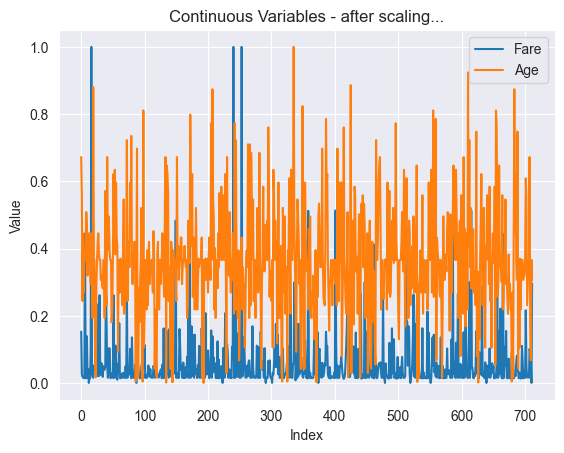

In [146]:
# ויזואליזציה לאחר סקאלינג
#ניתן לראות שכעת הערכים נעים בין 0 ל1

continuous_columns = ['Fare','Age']   #רשימת העמודות של המשתנים הרציפים
trainset[continuous_columns].plot()   #יצירת הגרף
plt.xlabel('Index')                   #כותרת ציר איקס
plt.ylabel('Value')                   #כותרת ציר ווי
plt.title('Continuous Variables - after scaling...')  #כותרת לגרף

## Part 3 - Experiments
You could add as many code cells as needed

In [147]:
# =========================
# Part 3 - Experiments (70 points)
# Requirements we satisfy here:
# 1) NO usage of the test-set during experiments (we use ONLY trainset with 5-fold CV)
# 2) 5-fold Cross Validation for every permutation in the grid
# 3) Metric: F1 for the positive/central class (Survived=1)
# 4) Grid-search over (Feature Engineering) x (Model + Hyperparameters)
# 5) Show ALL permutations and their mean CV scores in a dataframe
# =========================

RANDOM_STATE = 42

# --- Define X/y on TRAIN ONLY ---
target_col = "Survived"
feature_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']

X_train = trainset[feature_cols].copy()
y_train = trainset[target_col].astype(int).copy()

# We keep the test set aside. We'll use it only in Part 5.
X_test  = testset[feature_cols].copy()
y_test  = testset[target_col].astype(int).copy()

# --- Preprocessing (no leakage): impute + one-hot for Sex, numeric impute for others ---
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex']

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop"
)

# --- CV + metric ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
f1_pos = make_scorer(f1_score, pos_label=1)

# --- Pipelines (Feature Engineering + Models) ---
# Feature engineering metrics we test:
# (1) Scaling: no scaling / StandardScaler / MinMaxScaler
# (2) Feature selection: no selection / SelectKBest(mutual_info_classif, k=...)
#
# Note: after OneHotEncoder, matrix can be sparse.
# StandardScaler must use with_mean=False for sparse matrices.

pipe_knn = Pipeline(steps=[
    ("preprocess", preprocess),
    ("scaler", "passthrough"),      # FE metric #1
    ("select", "passthrough"),      # FE metric #2
    ("model", KNeighborsClassifier())
])

param_grid_knn = {
    "scaler": ["passthrough", StandardScaler(with_mean=False), MinMaxScaler()],
    "select": ["passthrough",
               SelectKBest(score_func=mutual_info_classif, k=6),
               SelectKBest(score_func=mutual_info_classif, k=10)],
    # hyperparameters (>=2) with >=2 values each
    "model__n_neighbors": [3, 5, 7, 9],
    "model__weights": ["uniform", "distance"],
    "model__metric": ["euclidean", "manhattan"]
}

pipe_dt = Pipeline(steps=[
    ("preprocess", preprocess),
    ("scaler", "passthrough"),      # keep for consistent grid structure (DT doesn't need scaling)
    ("select", "passthrough"),
    ("model", DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid_dt = {
    "scaler": ["passthrough"],  # DT not sensitive to scaling
    "select": ["passthrough",
               SelectKBest(score_func=mutual_info_classif, k=6),
               SelectKBest(score_func=mutual_info_classif, k=10)],
    # hyperparameters (>=2) with >=2 values each
    "model__criterion": ["gini", "entropy"],
    "model__max_depth": [None, 5, 10, 20],
    "model__min_samples_split": [2, 5, 10],
}

def run_grid(name, pipe, grid):
    gs = GridSearchCV(
        estimator=pipe,
        param_grid=grid,
        scoring=f1_pos,
        cv=cv,
        n_jobs=-1,
        refit=True,
        verbose=0
    )
    gs.fit(X_train, y_train)

    print(f"\n===== {name} =====")
    print("Best mean CV F1:", gs.best_score_)
    print("Best params:", gs.best_params_)

    # Show ALL permutations as a dataframe (required)
    results = pd.DataFrame(gs.cv_results_)
    show_cols = ["params", "mean_test_score", "std_test_score", "rank_test_score"]
    results_view = results[show_cols].sort_values("mean_test_score", ascending=False)
    display(results_view.head(30))  # show top 30
    return gs, results_view

gs_knn, results_knn = run_grid("KNN", pipe_knn, param_grid_knn)
gs_dt, results_dt   = run_grid("Decision Tree", pipe_dt, param_grid_dt)

# Combined comparison across models (nice + clear "best permutation")
combined = pd.concat([
    results_knn.assign(model="KNN"),
    results_dt.assign(model="Decision Tree"),
], ignore_index=True)

combined = combined.sort_values(["mean_test_score", "std_test_score"], ascending=[False, True])
print("\n===== All permutations across models (sorted) =====")
display(combined.head(40))

# Choose best model by mean CV F1
best_gs = gs_knn if gs_knn.best_score_ >= gs_dt.best_score_ else gs_dt
best_model_name = "KNN" if best_gs is gs_knn else "Decision Tree"

print("\n===== Best permutation (by mean CV F1) =====")
print("Best model:", best_model_name)
print("Best mean CV F1:", best_gs.best_score_)
print("Best params:", best_gs.best_params_)

results_df = combined
display(results_df.head(40))




===== KNN =====
Best mean CV F1: 0.733436833853038
Best params: {'model__metric': 'manhattan', 'model__n_neighbors': 7, 'model__weights': 'uniform', 'scaler': MinMaxScaler(), 'select': 'passthrough'}


,params,mean_test_score,std_test_score,rank_test_score
116,"{'model__metric': 'manhattan', 'model__n_neigh...",0.733437,0.022923,1
114,"{'model__metric': 'manhattan', 'model__n_neigh...",0.733437,0.022923,1
59,"{'model__metric': 'euclidean', 'model__n_neigh...",0.731567,0.018432,3
57,"{'model__metric': 'euclidean', 'model__n_neigh...",0.731567,0.018432,3
31,"{'model__metric': 'euclidean', 'model__n_neigh...",0.729816,0.028878,5
48,"{'model__metric': 'euclidean', 'model__n_neigh...",0.728398,0.024297,6
50,"{'model__metric': 'euclidean', 'model__n_neigh...",0.728398,0.024297,6
68,"{'model__metric': 'euclidean', 'model__n_neigh...",0.728164,0.022375,8
66,"{'model__metric': 'euclidean', 'model__n_neigh...",0.728164,0.022375,8
140,"{'model__metric': 'manhattan', 'model__n_neigh...",0.727052,0.018632,10



===== Decision Tree =====
Best mean CV F1: 0.7443152887906608
Best params: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 10, 'scaler': 'passthrough', 'select': 'passthrough'}


,params,mean_test_score,std_test_score,rank_test_score
6,"{'model__criterion': 'gini', 'model__max_depth...",0.744315,0.043131,1
33,"{'model__criterion': 'gini', 'model__max_depth...",0.744315,0.043131,1
35,"{'model__criterion': 'gini', 'model__max_depth...",0.744315,0.043131,1
8,"{'model__criterion': 'gini', 'model__max_depth...",0.744315,0.043131,1
40,"{'model__criterion': 'entropy', 'model__max_de...",0.740443,0.027964,5
7,"{'model__criterion': 'gini', 'model__max_depth...",0.737928,0.046408,6
70,"{'model__criterion': 'entropy', 'model__max_de...",0.736352,0.021959,7
43,"{'model__criterion': 'entropy', 'model__max_de...",0.731756,0.015859,8
26,"{'model__criterion': 'gini', 'model__max_depth...",0.731756,0.028749,9
24,"{'model__criterion': 'gini', 'model__max_depth...",0.731756,0.028749,9



===== All permutations across models (sorted) =====


,params,mean_test_score,std_test_score,rank_test_score,model
144,"{'model__criterion': 'gini', 'model__max_depth...",0.744315,0.043131,1,Decision Tree
145,"{'model__criterion': 'gini', 'model__max_depth...",0.744315,0.043131,1,Decision Tree
146,"{'model__criterion': 'gini', 'model__max_depth...",0.744315,0.043131,1,Decision Tree
147,"{'model__criterion': 'gini', 'model__max_depth...",0.744315,0.043131,1,Decision Tree
148,"{'model__criterion': 'entropy', 'model__max_de...",0.740443,0.027964,5,Decision Tree
149,"{'model__criterion': 'gini', 'model__max_depth...",0.737928,0.046408,6,Decision Tree
150,"{'model__criterion': 'entropy', 'model__max_de...",0.736352,0.021959,7,Decision Tree
0,"{'model__metric': 'manhattan', 'model__n_neigh...",0.733437,0.022923,1,KNN
1,"{'model__metric': 'manhattan', 'model__n_neigh...",0.733437,0.022923,1,KNN
151,"{'model__criterion': 'entropy', 'model__max_de...",0.731756,0.015859,8,Decision Tree



===== Best permutation (by mean CV F1) =====
Best model: Decision Tree
Best mean CV F1: 0.7443152887906608
Best params: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 10, 'scaler': 'passthrough', 'select': 'passthrough'}


,params,mean_test_score,std_test_score,rank_test_score,model
144,"{'model__criterion': 'gini', 'model__max_depth...",0.744315,0.043131,1,Decision Tree
145,"{'model__criterion': 'gini', 'model__max_depth...",0.744315,0.043131,1,Decision Tree
146,"{'model__criterion': 'gini', 'model__max_depth...",0.744315,0.043131,1,Decision Tree
147,"{'model__criterion': 'gini', 'model__max_depth...",0.744315,0.043131,1,Decision Tree
148,"{'model__criterion': 'entropy', 'model__max_de...",0.740443,0.027964,5,Decision Tree
149,"{'model__criterion': 'gini', 'model__max_depth...",0.737928,0.046408,6,Decision Tree
150,"{'model__criterion': 'entropy', 'model__max_de...",0.736352,0.021959,7,Decision Tree
0,"{'model__metric': 'manhattan', 'model__n_neigh...",0.733437,0.022923,1,KNN
1,"{'model__metric': 'manhattan', 'model__n_neigh...",0.733437,0.022923,1,KNN
151,"{'model__criterion': 'entropy', 'model__max_de...",0.731756,0.015859,8,Decision Tree


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [160]:
# =========================
# Part 4 - Training (10 points)
# Train again on the FULL trainset using the best combination from Part 3 (CV best).
# IMPORTANT: still NO test evaluation here (only training).
# =========================

best_model = best_gs.best_estimator_
best_model.fit(X_train, y_train)

# report the chosen configuration (from CV)
print("Trained best model on FULL trainset.")
print("Chosen model:", best_model_name)
print("Chosen params:", best_gs.best_params_)
print("Best mean CV F1 (from Part 3):", best_gs.best_score_)


Trained best model on FULL trainset.
Chosen model: Decision Tree
Chosen params: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 10, 'scaler': 'passthrough', 'select': 'passthrough'}
Best mean CV F1 (from Part 3): 0.7443152887906608


## Part 5 - Apply on test and show model performance estimation

In [150]:
# =========================
# Part 5 - Apply on test and show model performance estimation (10 points)
# Now (and only now) we evaluate on the test set.
# Requirements:
# 1) Show first 5 predictions on test
# 2) Show model quality (same metric as CV: F1 for class=1)
# =========================

y_pred_test = best_model.predict(X_test)

# Show first 5 predictions (required)
pred_preview = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred_test
})
display(pred_preview.head(5))

# Test quality estimation (required metric)
f1_test = f1_score(y_test, y_pred_test, pos_label=1)
print("Test F1 (Survived=1):", f1_test)

# (Optional but helpful) show extra metrics for understanding
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, pos_label=1)
recall_test = recall_score(y_test, y_pred_test, pos_label=1)

print("\nAdditional metrics (optional):")
print("Accuracy:", accuracy_test)
print("Precision (pos=1):", precision_test)
print("Recall (pos=1):", recall_test)


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,1
4,1,0


Test F1 (Survived=1): 0.6929133858267716

Additional metrics (optional):
Accuracy: 0.7821229050279329
Precision (pos=1): 0.6666666666666666
Recall (pos=1): 0.7213114754098361
